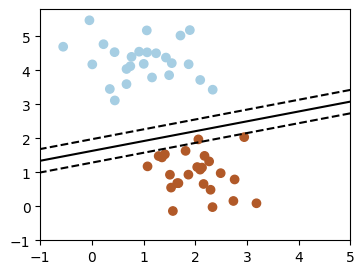

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_blobs

# we create 50 separable synthetic points
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)  # type: ignore

# fit the model
clf = SGDClassifier(loss="hinge", alpha=0.01, fit_intercept=True)
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]

plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.contour(
    X1, X2, Z, [-1.0, 0.0, 1.0], colors="k", linestyles=["dashed", "solid", "dashed"]
)
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)  # type: ignore

ax.axis("tight")


plt.show()
